In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def american_option_pricing(S, K, r, T, sigma, option_type='call', steps=100):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    option_values = np.maximum(0, S * (u ** np.arange(steps + 1)) * (d ** (steps - np.arange(steps + 1))) - K)

    for i in range(steps - 1, -1, -1):
        option_values[:i + 1] = np.exp(-r * dt) * (p * option_values[1:i + 2] + (1 - p) * option_values[:i + 1])
        if option_type == 'call':
            option_values[:i + 1] = np.maximum(option_values[:i + 1],
                                                S * (u ** np.arange(i + 1)) * (d ** (steps - i - np.arange(i + 1))) - K)
        else:
            option_values[:i + 1] = np.maximum(option_values[:i + 1],
                                                K - S * (u ** np.arange(i + 1)) * (d ** (steps - i - np.arange(i + 1))))

    delta = (option_values[1] - option_values[0]) / (S * (u - d))
    gamma = ((option_values[1] - option_values[0]) / S) / (S * (u - d))
    theta = (option_values[0] - option_values[1]) / dt

    return option_values[0], delta, gamma, theta

In [3]:
def plot_option_sensitivity(S0, K, r, T, sigma, option_type='call', steps=100):
    # Sensitivity to Stock Price
    stock_prices = np.linspace(80, 120, 100)
    option_prices = [american_option_pricing(S, K, r, T, sigma)[0] for S in stock_prices]

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.plot(stock_prices, option_prices, label='Option Price')
    plt.xlabel('Stock Price')
    plt.ylabel('Option Price')
    plt.title('Option Price Sensitivity to Stock Price')
    plt.legend()
    plt.grid(True)

    # Sensitivity to Volatility
    volatility_values = np.linspace(0.1, 0.5, 100)
    option_prices = [american_option_pricing(S0, K, r, T, vol, option_type)[0] for vol in volatility_values]

    plt.subplot(2, 3, 2)
    plt.plot(volatility_values, option_prices, label='Option Price')
    plt.xlabel('Volatility')
    plt.ylabel('Option Price')
    plt.title('Option Price Sensitivity to Volatility')
    plt.legend()
    plt.grid(True)

    # Delta Sensitivity to Time
    time_values = np.linspace(0.1, 2, 100)
    delta_values = [american_option_pricing(S0, K, r, t, sigma)[1] for t in time_values]

    plt.subplot(2, 3, 3)
    plt.plot(time_values, delta_values, label='Delta')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Delta')
    plt.title('Delta Sensitivity to Time')
    plt.legend()
    plt.grid(True)

    # Gamma Sensitivity to Time
    gamma_values = [american_option_pricing(S0, K, r, t, sigma)[2] for t in time_values]

    plt.subplot(2, 3, 4)
    plt.plot(time_values, gamma_values, label='Gamma')
    plt.xlabel('Time to Maturity')
    plt.ylabel('Gamma')
    plt.title('Gamma Sensitivity to Time')
    plt.legend()
    plt.grid(True)

    # Theta Sensitivity to Stock Price
    theta_stock_values = [american_option_pricing(S, K, r, T, sigma)[3] for S in stock_prices]

    plt.subplot(2, 3, 5)
    plt.plot(stock_prices, theta_stock_values, label='Theta')
    plt.xlabel('Stock Price')
    plt.ylabel('Theta')
    plt.title('Theta Sensitivity to Stock Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

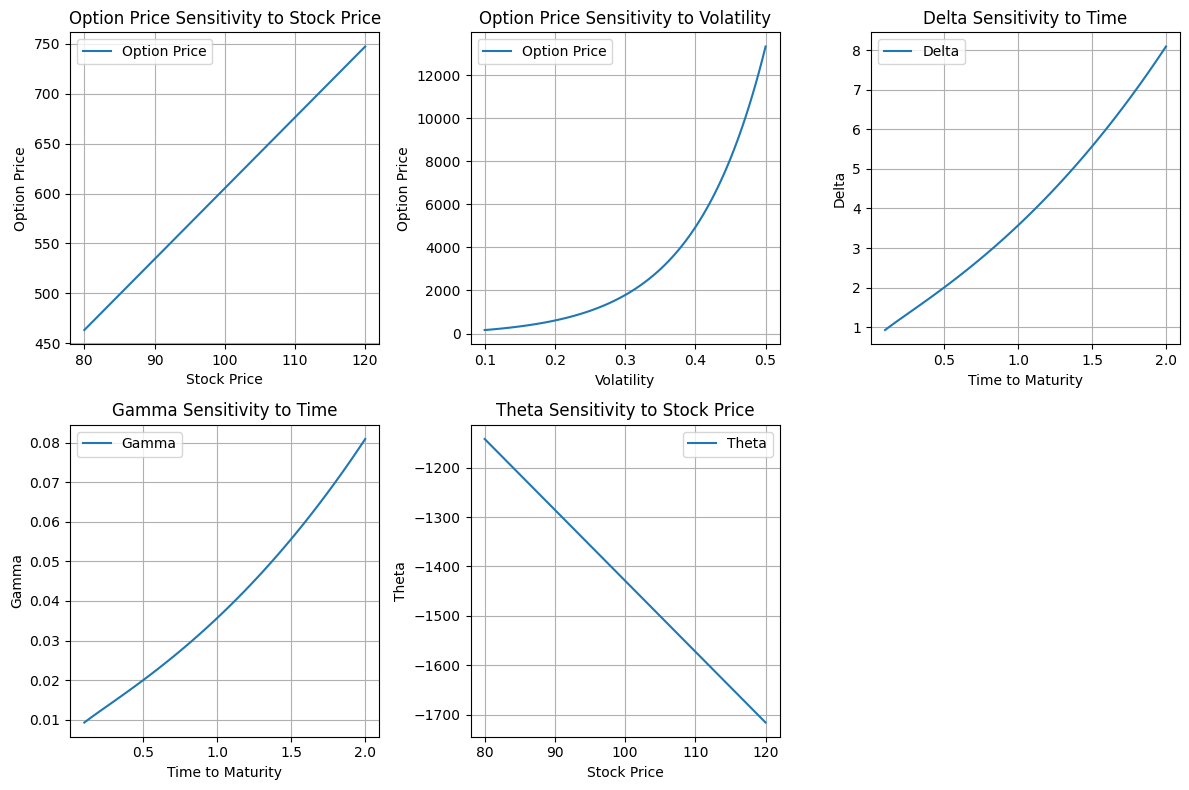

In [4]:
# Set parameters
S0 = 100  # Initial stock price
K = 110   # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility

# Plot sensitivities
plot_option_sensitivity(S0, K, r, T, sigma)